# Pymaceuticals Inc.
## By David Girma

### Observations
1. Capomulin Drug Regimen suggests that there is a high correlation between the weight of a mouse and its tumor volume. 
2. It will be worth making the analysis with another drug regimen with a much higher mean tumor variance, like the <br>
Ketapril. Maybe there is not a correlation and it's exclusive for certain drugs.
3. Metastatic sites per drug regime analysis would be great to determine if certain drugs affect more than just one <br>
organ/system.

<div class="alert alert-block alert-info">
<b>References:</b> Data generated by Mockaroo, LLC (2022). Realistic Data Generator.
</div>

__[Mockaroo, LLC (2022)](https://mockaroo.com)__
 

In [26]:
# Dependencies and Setup
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined = mouse_metadata.merge(study_results)

# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice.
number_of_mice = len(combined["Mouse ID"].unique())
print(number_of_mice)

249


In [45]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mice = combined.loc[combined.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicated_mice

array(['g989'], dtype=object)

In [49]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_mice_info = combined[combined['Mouse ID'].isin(duplicated_mice)==True]
duplicated_mice_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean = combined[combined['Mouse ID'].isin(duplicated_mice)==False]
combined_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [53]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = combined_clean["Mouse ID"].unique().size
print(number_of_mice_clean)

248


## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = combined_clean["Tumor Volume (mm3)"].groupby(combined_clean["Drug Regimen"]).mean()
median_tumor_volume = combined_clean["Tumor Volume (mm3)"].groupby(combined_clean["Drug Regimen"]).median()
var_tumor_volume = combined_clean["Tumor Volume (mm3)"].groupby(combined_clean["Drug Regimen"]).var()
std_tumor_volume = combined_clean["Tumor Volume (mm3)"].groupby(combined_clean["Drug Regimen"]).std()
sem_tumor_volume = combined_clean["Tumor Volume (mm3)"].groupby(combined_clean["Drug Regimen"]).sem()

summary_sts = pd.DataFrame({
    "Mean Tumor Volume":mean_tumor_volume,
    "Median Tumor Volume":median_tumor_volume,
    "Tumor Volume Variance":var_tumor_volume,
    "Tumor Volume Std. Dev.":std_tumor_volume,
    "Tumor Volume Std. Err.":sem_tumor_volume
})

summary_sts

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_sts_adv =  combined_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_sts_adv

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

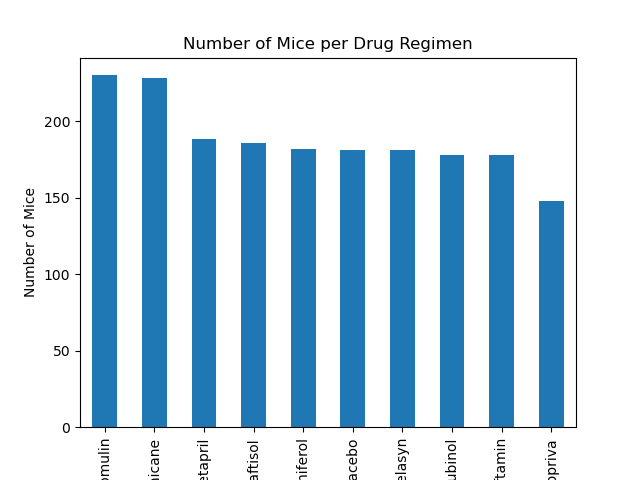

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plt.close()

mice_by_drug = combined_clean["Drug Regimen"].value_counts()
mice_by_drug
mice_by_drug.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")
plt.show()

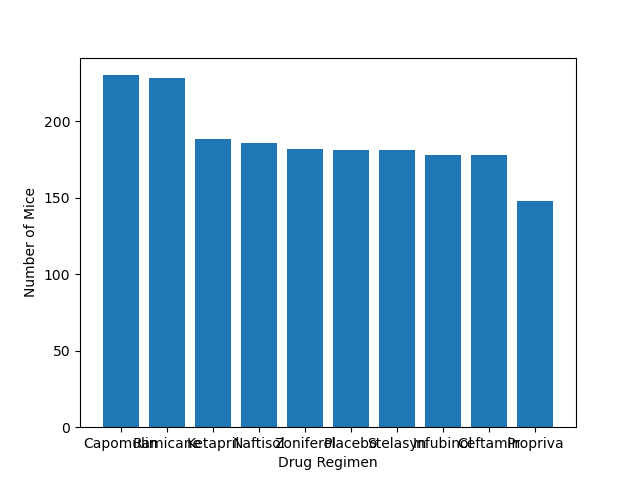

In [63]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.close()

x_axis = mice_by_drug.index.values
y_axis = mice_by_drug.values

plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

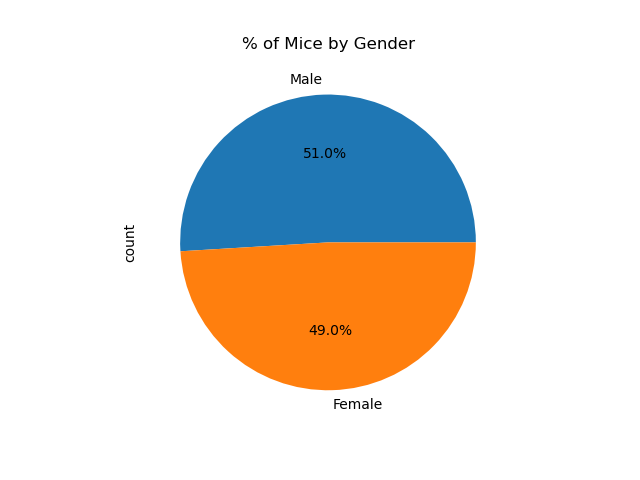

In [65]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
plt.close()

# Get the unique mice with their gender
mice_by_gender = combined_clean["Sex"].value_counts()

# Make the pie chart
mice_by_gender.plot.pie(autopct= "%1.1f%%")
plt.title("% of Mice by Gender")
plt.show()

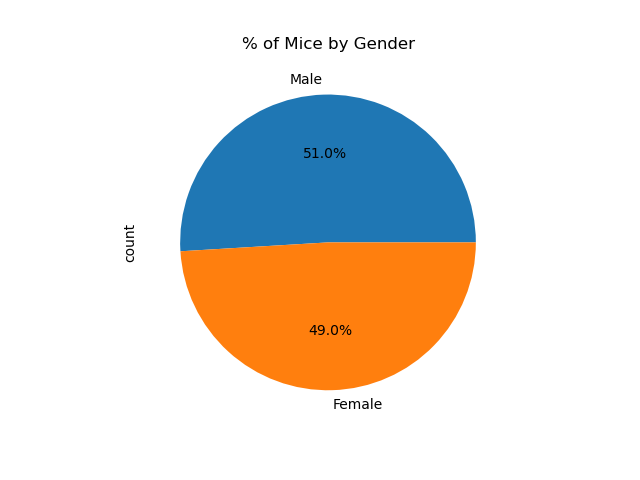

In [67]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.close()

# Make the pie chart
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
mice_by_gender.plot.pie(autopct="%1.1f%%")
plt.title("% of Mice by Gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse

mice_by_drug = combined_clean[combined_clean["Drug Regimen"].isin(drug_regimens)]
max_timepoint = pd.DataFrame(mice_by_drug.groupby(["Drug Regimen", "Mouse ID"]).max()["Timepoint"])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

combined_max_timepoint = pd.merge(max_timepoint, combined_clean, on=("Mouse ID","Timepoint"))
combined_max_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,s508,45,Ramicane,Male,1,17,30.276232,0
96,u196,45,Ramicane,Male,18,25,40.667713,3
97,w678,5,Ramicane,Female,5,24,43.166373,0
98,y449,15,Ramicane,Male,19,24,44.183451,0


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds

print(f"------------------------------------------------------------")

for drug in drug_regimens:
    quartiles_df = combined_max_timepoint[combined_max_timepoint["Drug Regimen"].str.match(drug)]
     
    q1 = quartiles_df["Tumor Volume (mm3)"].quantile(0.25)
    q3 = quartiles_df["Tumor Volume (mm3)"].quantile(0.75)
    iqr = q3 - q1

    lower_bound = round(q1 - (1.5*iqr),2)
    upper_bound = round(q3 + (1.5*iqr),2)

    outliers = [i for i in quartiles_df["Tumor Volume (mm3)"] if (i > upper_bound or i < lower_bound) ]

    print(f"The lower quartile of {drug} treatments is: {round(q1, 2)}")
    print(f"The upper quartile of {drug} treatments is: {round(q3, 2)}")
    print(f"The interquartile range (IQR) of {drug} treatments is: {round(iqr, 2)}")
    print(f"Values below {round(lower_bound, 2)} could be {drug} outliers.")
    print(f"Values above {round(upper_bound, 2)} could be {drug} outliers.")
    print(f"Outliers for {drug}: {outliers}")
    print(f"------------------------------------------------------------")

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range (IQR) of Capomulin treatments is: 7.78
Values below 20.7 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
Outliers for Capomulin: []
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range (IQR) of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
Outliers for Ramicane: []
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range (IQR) of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.74 coul

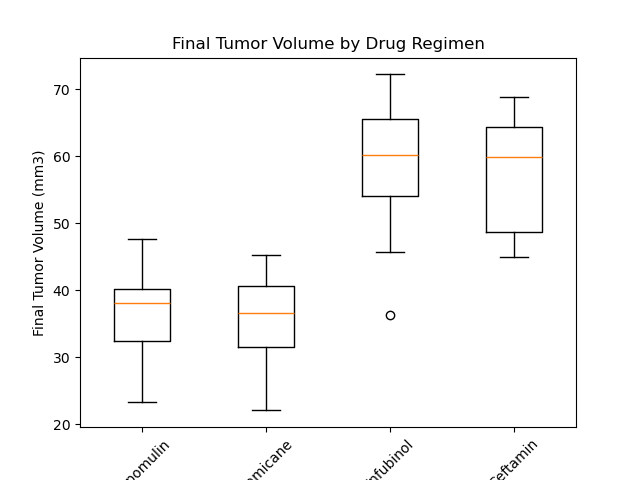

In [74]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.close()

for drug in drug_regimens:
    tumor_volume_data.append(list(combined_max_timepoint[combined_max_timepoint["Drug Regimen"].str.match(drug)]["Tumor Volume (mm3)"]))

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_data)
plt.xlabel("Drug Regimen")
plt.xticks([1,2,3,4], labels=drug_regimens, rotation=45)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume by Drug Regimen")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

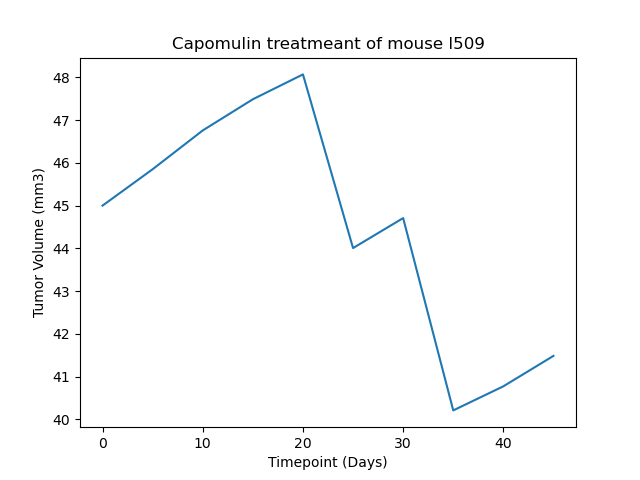

In [77]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = combined_clean[combined_clean["Drug Regimen"].str.match("Capomulin")]

# let's pick my fav number (9), born in May 9th -> Mouse ID: I509
picked_mouse = capomulin_mice.loc[capomulin_mice["Mouse ID"] == "l509",:]

mouse_timepoint = picked_mouse["Timepoint"]
mouse_tumorvol = picked_mouse["Tumor Volume (mm3)"]

plt.close()

fig1, ax1 = plt.subplots()
plt.title("Capomulin treatmeant of mouse l509")
plt.plot(mouse_timepoint, mouse_tumorvol)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

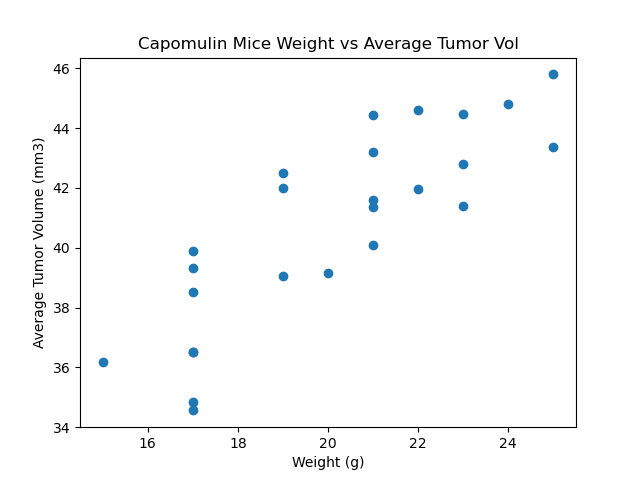

In [79]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.close()

avg_capomulin_vol = capomulin_mice.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
avg_capomulin_vol.head()

plt.scatter(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"])
plt.title("Capomulin Mice Weight vs Average Tumor Vol")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.71


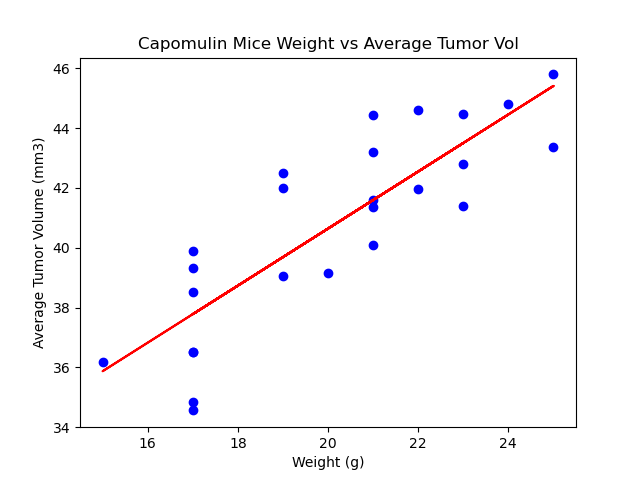

In [82]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.close()

from scipy import stats
cap_slope, cap_int, cap_r, cap_p, cap_std_err = stats.linregress(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"])

cap_fit = cap_slope * avg_capomulin_vol["Weight (g)"] + cap_int

plt.scatter(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"],color="blue")
plt.plot(avg_capomulin_vol["Weight (g)"], cap_fit, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Mice Weight vs Average Tumor Vol")
print(f"The correlation between mouse weight and the average tumor volume is: {round(cap_r**2,2)}")